In [1]:
#%pip install easyocr imutils


     ---------------------------------------- 2.9/2.9 MB 8.0 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
     ---------------------------------------- 94.5/94.5 kB 5.6 MB/s eta 0:00:00
     -------------------------------------- 313.0/313.0 kB 9.8 MB/s eta 0:00:00
     ---------------------------------------- 23.7/23.7 MB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 35.0/35.0 MB 4.4 MB/s eta 0:00:00
     -------------------------------------- 151.7/151.7 kB 9.4 MB/s eta 0:00:00
     ---------------------------------------- 1.4/1.4 MB 9.7 MB/s eta 0:00:00
     ---------------------------------------- 3.4/3.4 MB 9.8 MB/s eta 0:00:00
     ---------------------------------------- 4.2/4.2 MB 8.9 MB/s eta 0:00:00
     -------------------------------------- 219.4/219.4 kB 6.7 MB/s eta 0:00:00
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25855 sha256=3b5b302d3c7e2de1d4


[notice] A new release of pip available: 22.3.1 -> 23.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr

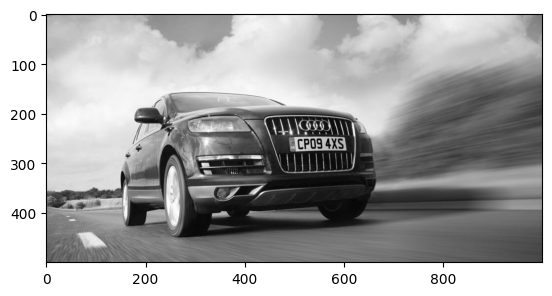

In [4]:
img = cv2.imread('image1.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR))

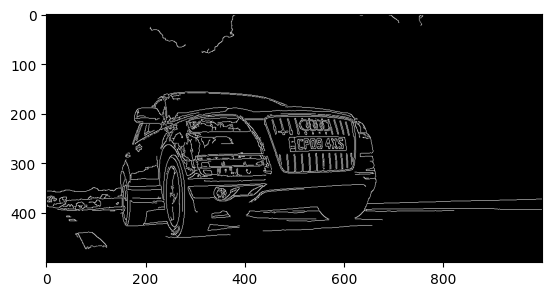

In [5]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17)
edged = cv2.Canny(bfilter, 30, 200)
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

In [6]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [7]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break
location 

array([[[489, 252]],

       [[493, 278]],

       [[605, 275]],

       [[601, 249]]], dtype=int32)

In [8]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

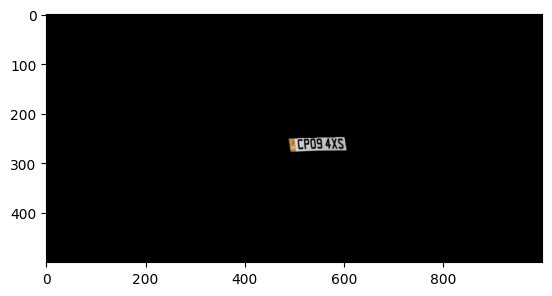

In [9]:
plt.imshow(new_image)

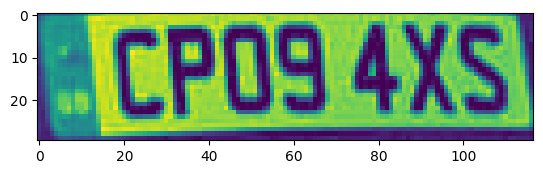

In [10]:
(x, y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cropped_image)

In [13]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[14, 0], [117, 0], [117, 30], [14, 30]], 'Cpog 4XS]', 0.680748734678755)]